In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
);
""")

sales_data = [
    ('Laptop', 2, 1200.00),
    ('Mouse', 10, 25.00),
    ('Keyboard', 5, 75.00),
    ('Laptop', 1, 1200.00),
    ('Monitor', 3, 300.00),
    ('Mouse', 5, 25.00),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()

conn.close()

print("Database 'sales_data.db' created and populated successfully!")

Database 'sales_data.db' created and populated successfully!


In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM
    sales
GROUP BY
    product;
"""

df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:")
print(df)

Sales Summary:
    product  total_qty  revenue
0  Keyboard          5    375.0
1    Laptop          3   3600.0
2   Monitor          3    900.0
3     Mouse         15    375.0


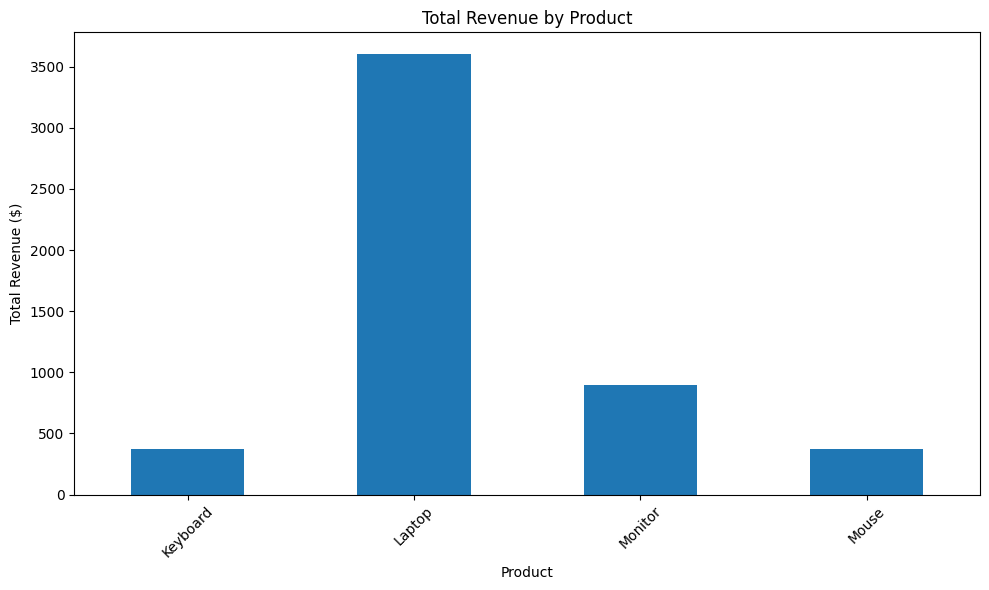

In [6]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False, figsize=(10, 6))

plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue ($)')

plt.xticks(rotation=45)

plt.tight_layout()

# plt.show()

plt.savefig("sales_revenue_chart.png")